 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [110]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [111]:
# Reading whale returns

whale_return_csv= Path("./Resources/whale_returns.csv")
whale_return_df = pd.read_csv(whale_return_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
whale_return_df.sort_index(inplace=True)

In [112]:
# Count nulls
wrdf_nulls = whale_return_df.isnull().sum()
wrdf_nulls

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [113]:
# Drop nulls
whale_return_df= whale_return_df.dropna()
whale_return_df.tail

<bound method NDFrame.tail of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496     

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [114]:
# Reading algorithmic returns
algo_return_csv = Path("./Resources/algo_returns.csv")
algo_return_df = pd.read_csv(algo_return_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
algo_return_df.sort_index(inplace=True)

In [115]:
# Count nulls
algo_return_df.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [116]:
# Drop nulls
algo_return_df = algo_return_df.dropna()
algo_return_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [117]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("./Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp500_history_df.sort_index(inplace=True)
sp500_history_df

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [118]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [119]:
# Fix Data Types
sp500_history_df ['Close'] = sp500_history_df['Close'].str.replace("$","")
sp500_history_df ['Close'] = sp500_history_df['Close'].astype('float')
sp500_history_df.dtypes




/Users/anthonyfranco/opt/anaconda3/envs/dev/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [120]:
# Calculate Daily Returns
sp500_history_df_returns = sp500_history_df.pct_change()
sp500_history_df_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [121]:
# Drop nulls
sp500_history_df_returns = sp500_history_df_returns.dropna()

In [122]:
# Rename `Close` Column to be specific to this portfolio.
sp500_history_df_returns.columns = ['SP500 Returns']
sp500_history_df_returns.head()

,SP500 Returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [123]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
joined_returns_df = pd.concat([whale_return_df,algo_return_df,sp500_history_df_returns],axis = 'columns' , join= 'inner')
joined_returns_df.sort_index(inplace=True)
joined_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

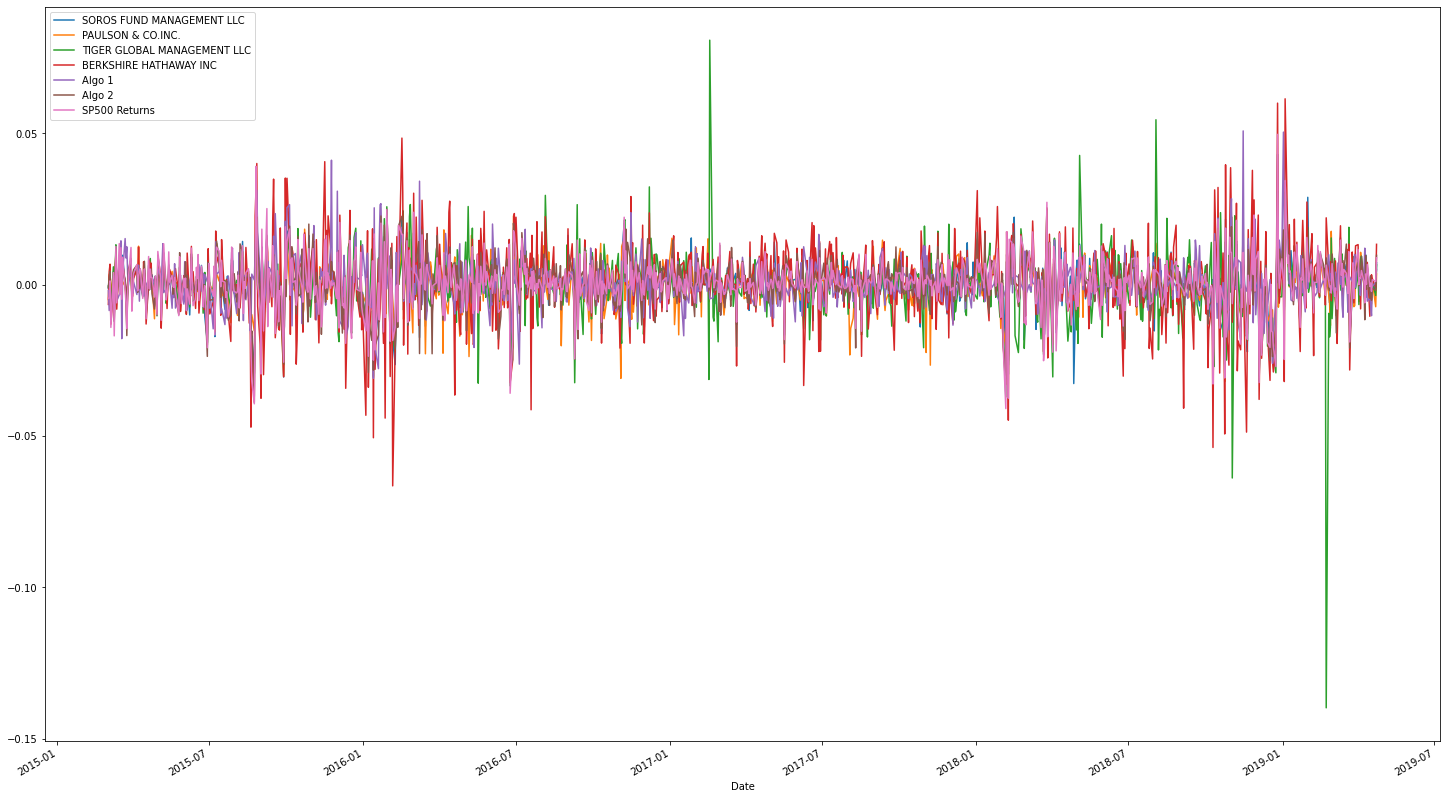

In [124]:
# Plot daily returns of all portfolios
joined_returns_df.plot(figsize= (25,15))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

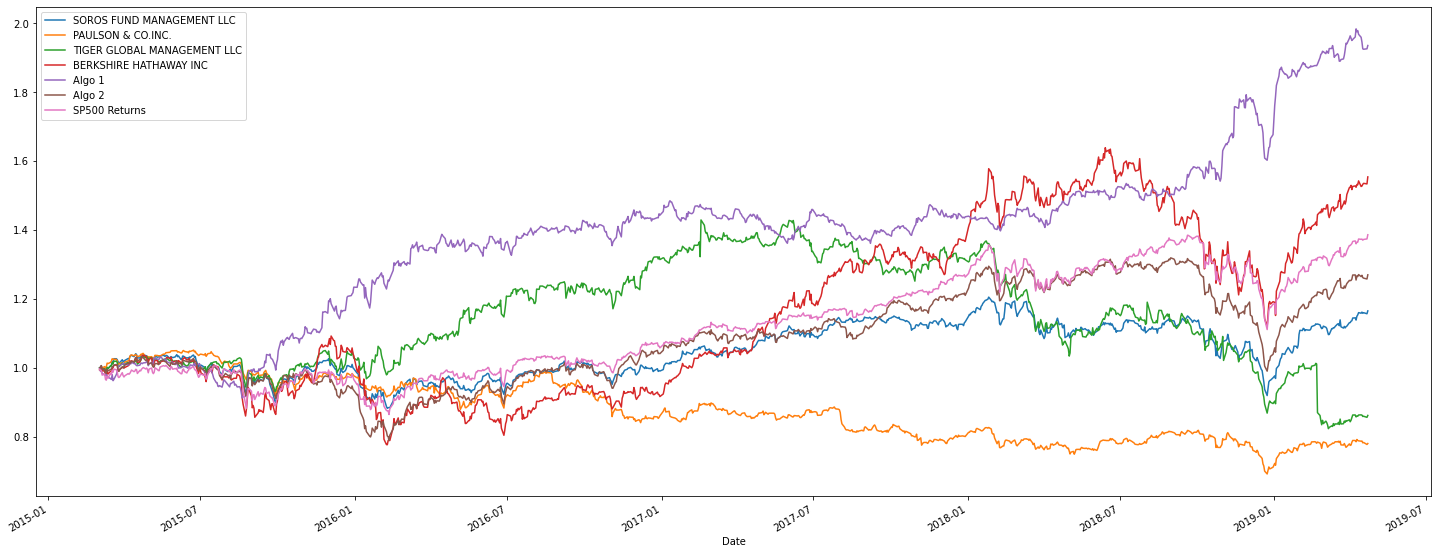

In [125]:
# Calculate cumulative returns of all portfolios
cum_returns = (joined_returns_df + 1).cumprod()

# Plot cumulative returns
cum_returns.plot(figsize= (25,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Box Risk Visual'}>

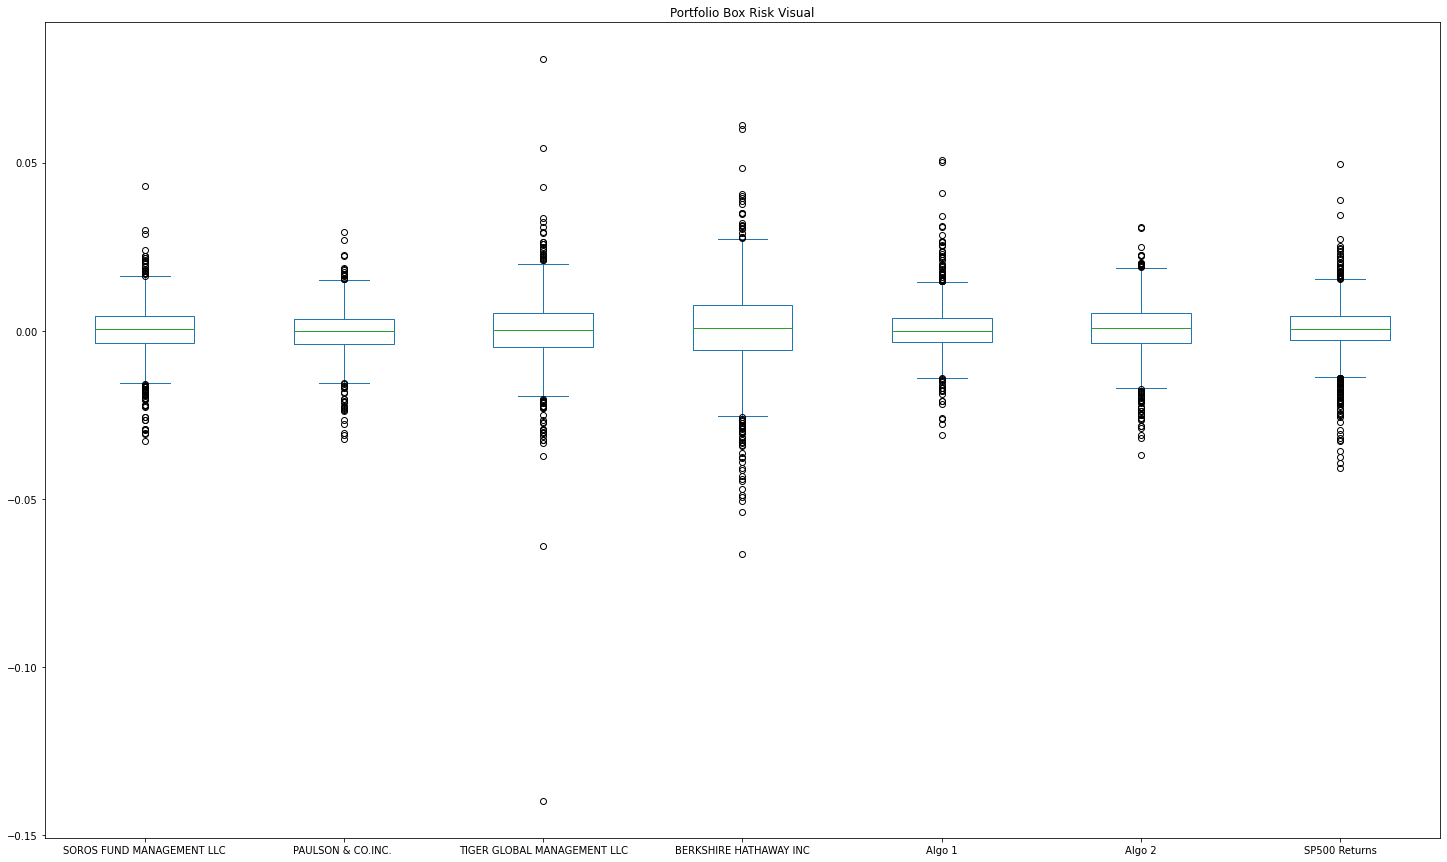

In [126]:
# Box plot to visually show risk
joined_returns_df.plot(kind= 'box', figsize= (25,15), title= "Portfolio Box Risk Visual")


### Calculate Standard Deviations

In [127]:
# Calculate the daily standard deviations of all portfolios
all_st_dev = joined_returns_df.std()
all_st_dev

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP500 Returns                  0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [128]:
# Calculate  the daily standard deviation of S&P 500
sp500_st_dev = sp500_history_df_returns.std


# Determine which portfolios are riskier than the S&P 500

print("Tiger Global and Berkshire Hathway have higher standard deviations than the S&P 500 making them riskier")


Tiger Global and Berkshire Hathway have higher standard deviations than the S&P 500 making them riskier


### Calculate the Annualized Standard Deviation

In [129]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = all_st_dev*np.sqrt(252)
annual_std.tail()

TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP500 Returns                  0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

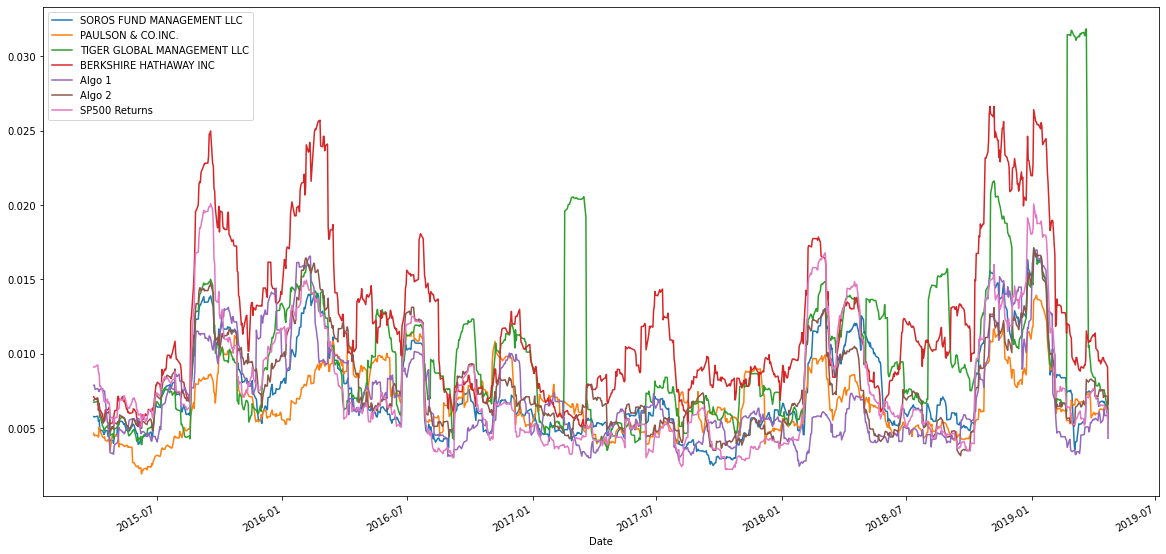

In [130]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = joined_returns_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

In [131]:
# Calculate the correlation
corr_mtx = joined_returns_df.corr()

# Display de correlation matrix
corr_mtx

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500 Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP500 Returns,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'60 Day Beta of Berkshire vs S&P 500'}, xlabel='Date'>

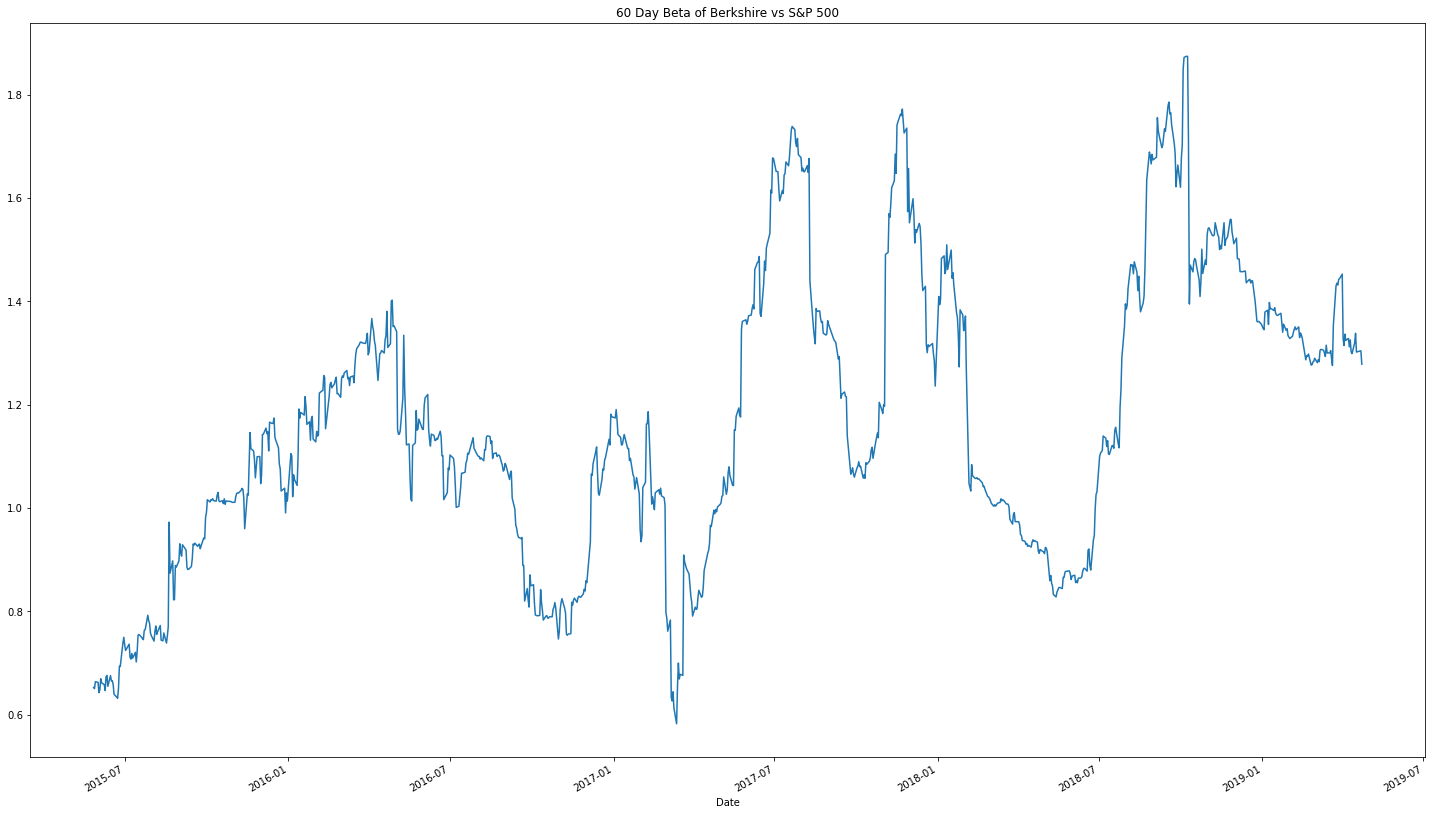

In [132]:
# Calculate covariance of a single portfolio
berk_cov = joined_returns_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(joined_returns_df['SP500 Returns'])
# Calculate variance of S&P 500
variance = joined_returns_df['SP500 Returns'].rolling(window=60).var()

# Computing beta
beta = berk_cov/variance

# Plot beta trend
beta.plot(figsize=(25,15), title="60 Day Beta of Berkshire vs S&P 500")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:title={'center':'Portfolio Exponentially Weighted Average'}, xlabel='Date'>

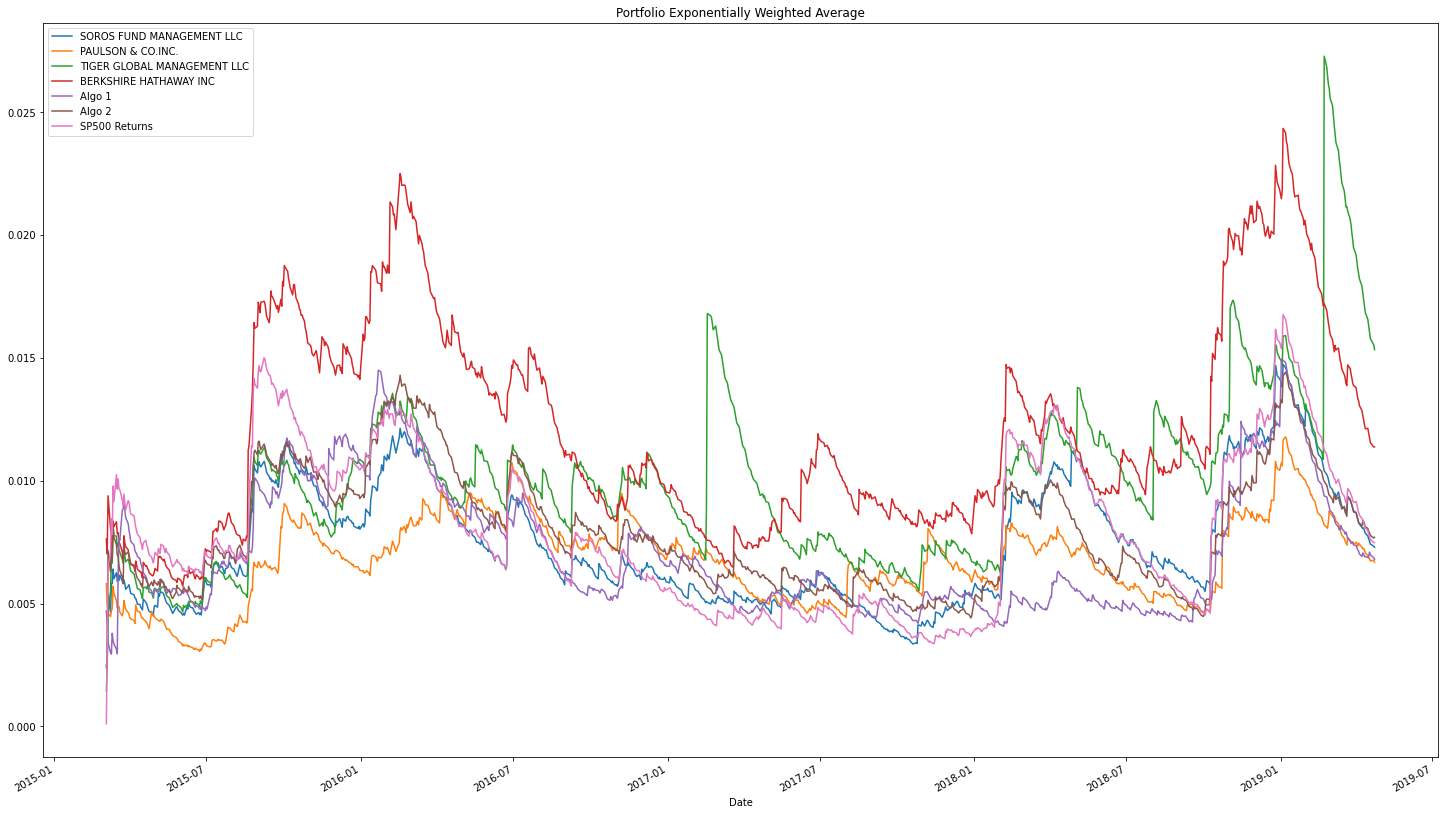

In [133]:
# Use `ewm` to calculate the rolling window
exp_wma = joined_returns_df.ewm(halflife = 21).std()
exp_wma.plot(figsize=(25,15), title="Portfolio Exponentially Weighted Average")

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [134]:
# Annualized Sharpe Ratios
annual_sharpe = (joined_returns_df.mean()* 252) / (joined_returns_df.std() * np.sqrt(252))
annual_sharpe

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP500 Returns                  0.648267
dtype: float64

<AxesSubplot:>

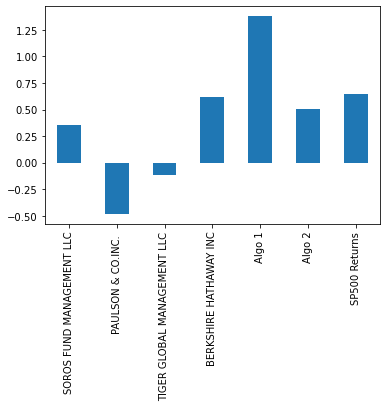

In [135]:
# Visualize the sharpe ratios as a bar plot
annual_sharpe.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [136]:
# Reading data from 1st stock
apple = Path("./Resources/aapl_historical.csv")
apple_df = pd.read_csv(apple, index_col= 'Trade DATE', infer_datetime_format= True, parse_dates=True)
apple_df.sort_index(inplace=True)
apple_df = apple_df.drop(columns=['Symbol'])
apple_df

,NOCP
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99
...,...
2019-05-03,211.75
2019-05-06,208.48
2019-05-07,202.86


In [137]:
# Reading data from 2nd stock
google = Path("./Resources/goog_historical.csv")
goog_df = pd.read_csv(google, index_col= 'Trade DATE', infer_datetime_format= True, parse_dates=True)
goog_df.sort_index(inplace=True)
goog_df = goog_df.drop(columns=['Symbol'])
goog_df

,NOCP
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59
...,...
2019-05-03,1185.40
2019-05-06,1189.39
2019-05-07,1174.10


In [138]:
# Reading data from 3rd stock
costco = Path("./Resources/cost_historical.csv")
cost_df = pd.read_csv(costco, index_col= 'Trade DATE', infer_datetime_format= True, parse_dates=True)
cost_df.sort_index(inplace=True)
cost_df = cost_df.drop(columns=['Symbol'])
cost_df

,NOCP
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60
...,...
2019-05-03,244.62
2019-05-06,244.23
2019-05-07,240.18


In [139]:
# Combine all stocks in a single DataFrame
combined_stocks_df = pd.concat([apple_df, goog_df, cost_df], axis = 'columns', join='inner')
combined_stocks_df.columns=['AAPL', 'GOOG', 'COST']
combined_stocks_df


,AAPL,GOOG,COST
Trade DATE,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60
...,...,...,...
2019-05-03,211.75,1185.40,244.62
2019-05-06,208.48,1189.39,244.23
2019-05-07,202.86,1174.10,240.18


In [140]:
# Calculate daily returns
whole_portfolio_daily = combined_stocks_df.pct_change()

# Drop NAs
whole_portfolio_daily.dropna(inplace=True)

# Display sample data
whole_portfolio_daily

,AAPL,GOOG,COST
Trade DATE,,,
2018-05-14,-0.002333,0.001766,0.000613
2018-05-15,-0.009088,-0.019060,-0.002042
2018-05-16,0.009333,0.002354,0.016523
2018-05-17,-0.006324,-0.002940,0.004479
2018-05-18,-0.003637,-0.011339,-0.003206
...,...,...,...
2019-05-03,0.012431,0.019602,0.007953
2019-05-06,-0.015443,0.003366,-0.001594
2019-05-07,-0.026957,-0.012855,-0.016583


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [141]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = whole_portfolio_daily.dot(weights)

# Display sample data
portfolio_return

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [142]:
# Join your returns DataFrame to the original returns DataFrame
portfolio_return['Total Returns'] = whole_portfolio_daily
portfolio_return

Trade DATE
2018-05-14 00:00:00                                             0.000015
2018-05-15 00:00:00                                            -0.010064
2018-05-16 00:00:00                                             0.009403
2018-05-17 00:00:00                                            -0.001595
2018-05-18 00:00:00                                            -0.006061
                                             ...                        
2019-05-06 00:00:00                                            -0.004557
2019-05-07 00:00:00                                            -0.018798
2019-05-08 00:00:00                                            -0.000547
2019-05-09 00:00:00                                            -0.001751
Total Returns                          AAPL      GOOG      COST
Trade...
Length: 250, dtype: object

In [143]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
portfolio_return.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [144]:
# Calculate the annualized `std`
portfolio_ann_std = whole_portfolio_daily.std()*np.sqrt(252)
portfolio_ann_std

AAPL    0.296955
GOOG    0.263554
COST    0.209320
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [145]:
# Calculate rolling standard deviation
port_roll_std = whole_portfolio_daily.rolling(window=21).std

# Plot rolling standard deviation
port_roll_std.plot()

AttributeError: 'function' object has no attribute 'plot'

### Calculate and plot the correlation

<AxesSubplot:>

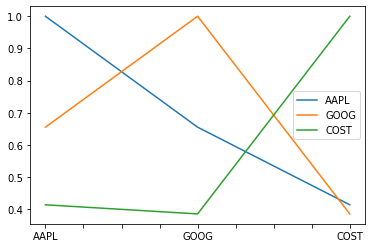

In [ ]:
# Calculate and plot the correlation
portfolio_correlation = whole_portfolio_daily.corr()
portfolio_correlation.plot()

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':' 21 Day Return Volatility'}, xlabel='Trade DATE'>

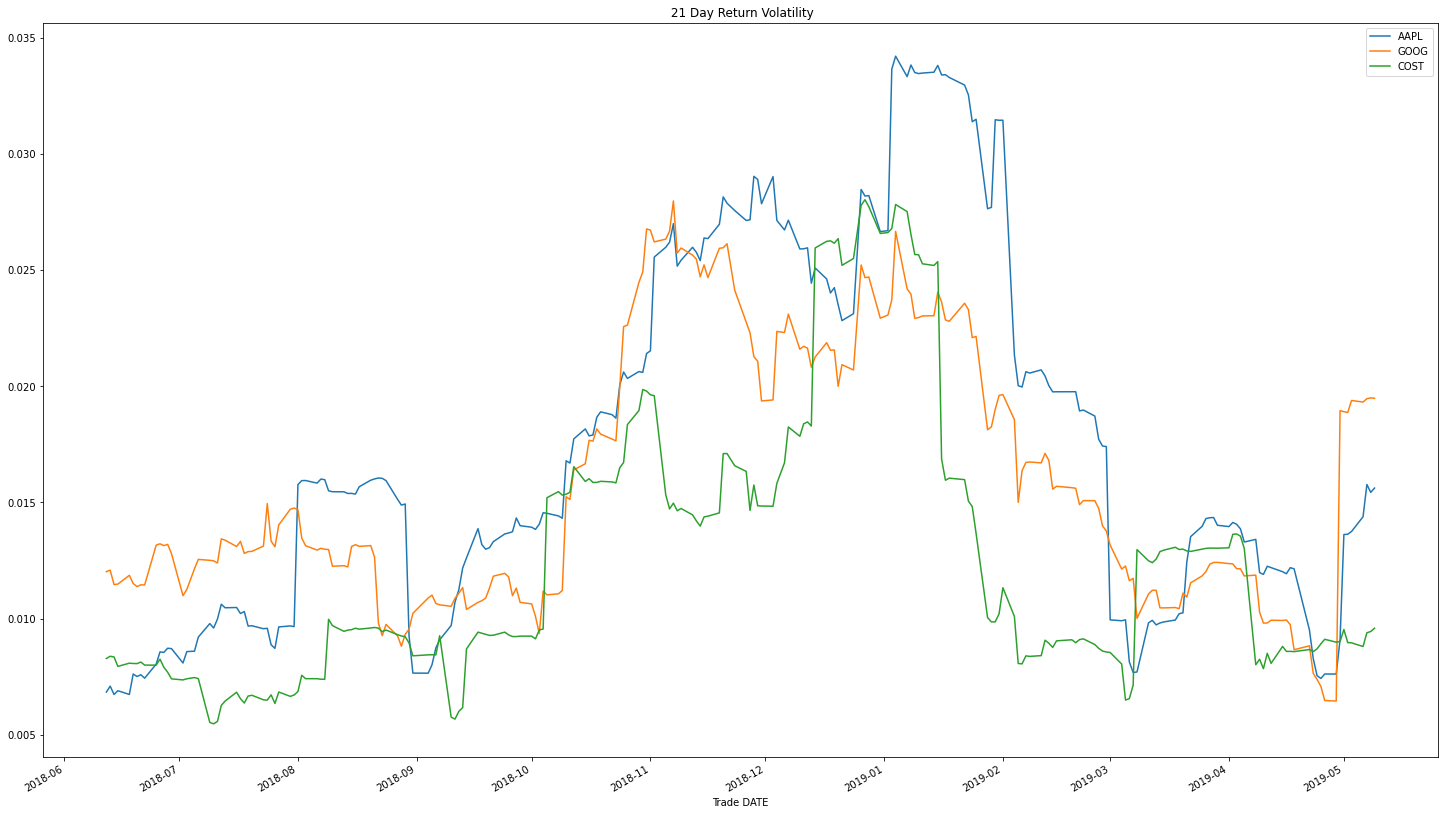

In [ ]:
# Calculate and plot Beta
sixtyday_beta = whole_portfolio_daily.rolling(window=21).std()
sixtyday_beta.plot(figsize=(25,15), title=' 21 Day Return Volatility')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualized Sharpe Ratios
whole_portfolio_sharpe = (whole_portfolio_daily.mean()* 252) / (portfolio_return * np.sqrt(252))
whole_portfolio_sharpe

2018-05-14 00:00:00                                                  NaN
2018-05-15 00:00:00                                                  NaN
2018-05-16 00:00:00                                                  NaN
2018-05-17 00:00:00                                                  NaN
2018-05-18 00:00:00                                                  NaN
                                             ...                        
2019-05-09 00:00:00                                                  NaN
AAPL                                                                 NaN
COST                                                                 NaN
GOOG                                                                 NaN
Total Returns                      AAPL  GOOG  COST
Trade DATE       ...
Length: 253, dtype: object

In [ ]:
# Visualize the sharpe ratios as a bar plot
whole_portfolio_sharpe.plot()

TypeError: no numeric data to plot

### How does your portfolio do?

Write your answer here!

In [146]:
print('cant figure out what happened here but it should have performed better than most')

cant figure out what happened here but it should have performed better than most
